<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


<h3>Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data.<


In [221]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!mamba install html5lib==1.1 -y
!pip install requests==2.26.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64                                          Using cache
pkgs/main/n

In [222]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Graphing Function


In [223]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Use yfinance to Extract Stock Data


In [224]:
tesla_ticker = yf.Ticker("TSLA")

In [225]:
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)

In [226]:

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [227]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

In [228]:
soup = BeautifulSoup(html_data, 'html.parser')
revenue_table = soup.find('table')

In [229]:
if revenue_table:
    # Extract data from the table and store it in a list of dictionaries
    data = []
    for row in revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        date = cols[0].text
        revenue = cols[1].text.replace(',', '').replace('$', '')
        data.append({"Date": date, "Revenue": revenue})

In [230]:
    tesla_revenue = pd.DataFrame(data)

In [231]:
tesla_revenue.dropna(subset=["Revenue"], inplace=True)

In [232]:
tesla_data.tail()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3329,2023-09-20,267.040009,273.929993,262.459991,262.589996,122514600,0,0.0
3330,2023-09-21,257.850006,260.859985,254.210007,255.699997,119531000,0,0.0
3331,2023-09-22,257.399994,257.790009,244.479996,244.880005,127024300,0,0.0
3332,2023-09-25,243.380005,247.100006,238.309998,246.990005,104636600,0,0.0
3333,2023-09-26,242.979996,249.550003,241.660004,244.119995,101741600,0,0.0


## Use yfinance to Extract Stock Data


In [233]:
GameStop = yf.Ticker("GME")

In [234]:
gme_data = GameStop.history(period="max")

In [235]:
gme_data.reset_index(inplace=True)

## Use Webscraping to Extract GME Revenue Data


In [236]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [237]:
soup = BeautifulSoup(html_data, 'html.parser')
gme_revenue = soup.find('table')

In [238]:
if gme_revenue:
        # Extract data from the table and store it in a list of dictionaries
        data = []
        for row in gme_revenue.find_all('tr')[1:]:
            cols = row.find_all('td')
            date = cols[0].text
            revenue = cols[1].text.replace(',', '').replace('$', '')
            data.append({"Date": date, "Revenue": revenue})
           

In [239]:
gme_revenue = pd.DataFrame(data)
gme_revenue.dropna(subset=["Revenue"], inplace=True)
gme_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Plot Tesla Stock Graph


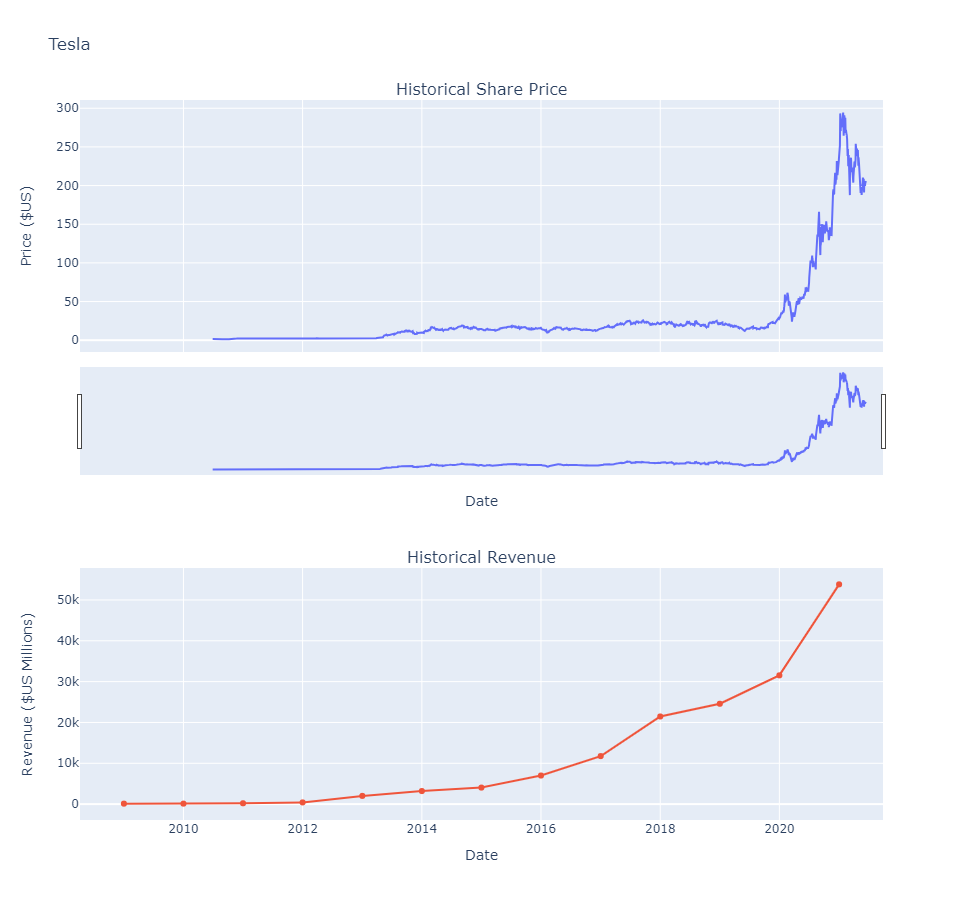

In [240]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

#Plot GameStop Stock Graph


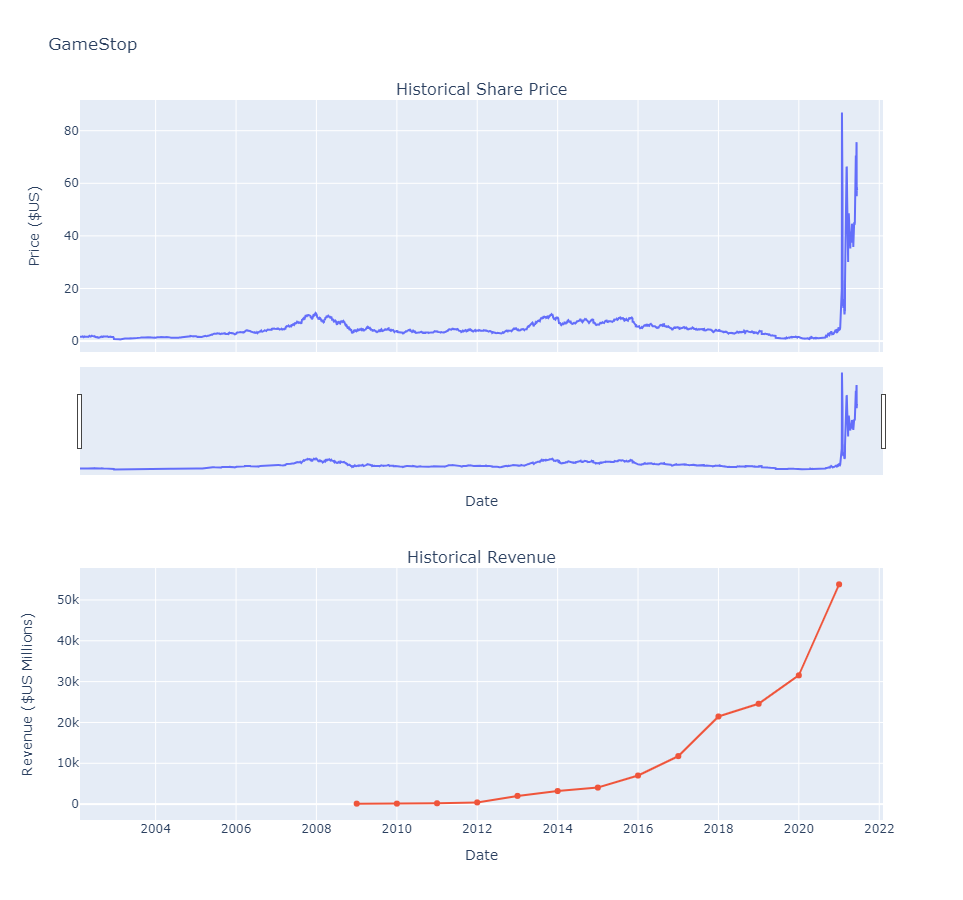

In [241]:
make_graph(gme_data, gme_revenue, 'GameStop')